In [2]:
import keras
from keras.models import Model
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
from keras.layers import Reshape, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
import numpy as np
from PIL import Image
import os
from matplotlib import pyplot as plt

%matplotlib inline
import cv2

c:\users\sun tex\appdata\local\programs\python\python35\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.


In [3]:
def training_image_data():
    train_images=[]
    PATH = 'D:\\SARANYA-PhD\\Dataset\\Training_set'
    # for each folder (holding a different set of fruits)
    for directory in os.listdir(PATH):
        # for each image in the folder
        DATA_PATH=PATH + '\\' + directory
        for image in os.listdir(DATA_PATH):
            img = cv2.imread(os.path.join(DATA_PATH,image))  # convert to array
            img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            dim=(64,64)
            new_array=cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
            new_array=np.array(new_array)
            #print(len(new_array))
            if directory=="Apple":
                ohl=np.array([1,0,0,0,0,0,0,0])
            elif directory=="Apple2":
                ohl=np.array([0,1,0,0,0,0,0,0])
            elif directory=="Apple3":
                ohl=np.array([0,0,1,0,0,0,0,0])
            elif directory=="Apple4":
                ohl=np.array([0,0,0,1,0,0,0,0])
            elif directory=="Apple5":
                ohl=np.array([0,0,0,0,1,0,0,0])
            elif directory=="Banana":
                ohl=np.array([0,0,0,0,0,1,0,0])
            elif directory=="Orange":
                ohl=np.array([0,0,0,0,0,0,1,0])
            elif directory=="Pomegranate":
                ohl=np.array([0,0,0,0,0,0,0,1])
            train_images.append([new_array,ohl])
        
    print(len(train_images))
    return(train_images)    
        

In [4]:
def testing_image_data():
    test_images=[]
    PATH = 'D:\\SARANYA-PhD\\Dataset\\Testing_set'
    # for each folder (holding a different set of fruits)
    for directory in os.listdir(PATH):
        # for each image in the folder
        DATA_PATH=PATH + '\\' + directory
        for image in os.listdir(DATA_PATH):
            img = cv2.imread(os.path.join(DATA_PATH,image))  # convert to array
            img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            dim=(64,64)
            new_array=cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
            new_array=np.array(new_array)
            #print(len(new_array))
            if directory=="Apple":
                ohl=np.array([1,0,0,0,0,0,0,0])
            elif directory=="Apple2":
                ohl=np.array([0,1,0,0,0,0,0,0])
            elif directory=="Apple3":
                ohl=np.array([0,0,1,0,0,0,0,0])
            elif directory=="Apple4":
                ohl=np.array([0,0,0,1,0,0,0,0])
            elif directory=="Apple5":
                ohl=np.array([0,0,0,0,1,0,0,0])
            elif directory=="Banana":
                ohl=np.array([0,0,0,0,0,1,0,0])
            elif directory=="Orange":
                ohl=np.array([0,0,0,0,0,0,1,0])
            elif directory=="Pomegranate":
                ohl=np.array([0,0,0,0,0,0,0,1])
            test_images.append([new_array,ohl])
        
    print(len(test_images))
    return(test_images)    

In [5]:
training_images = training_image_data()
testing_images = testing_image_data()

tr_img_data = np.array([i[0] for i in training_images]).reshape(-1,64,64,3)
tr_lbl_data = np.array([i[1] for i in training_images])

tst_img_data = np.array([i[0] for i in testing_images]).reshape(-1,64,64,3)
tst_lbl_data = np.array([i[1] for i in testing_images])

3610
1226


In [6]:
import timeit

In [31]:
 np.random.seed(12)
model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5), activation='relu',strides=2, input_shape=[64,64,3]))
#model.add(MaxPooling2D( strides=(2, 2)))
model.add(Conv2D(16, (5, 5),strides=2, activation='relu'))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(8, activation='softmax'))
model.summary()
#model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
#model.fit(tr_img_data, tr_lbl_data, batch_size=128, epochs=10, verbose=1, validation_data=(tst_img_data, tst_lbl_data))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 30, 30, 32)        2432      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 13, 13, 16)        12816     
_________________________________________________________________
flatten_8 (Flatten)          (None, 2704)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 32)                86560     
_________________________________________________________________
dropout_8 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 264       
Total params: 102,072
Trainable params: 102,072
Non-trainable params: 0
_________________________________________________________________


In [32]:
start = timeit.default_timer()  
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(tr_img_data, tr_lbl_data,
          batch_size=128,
          epochs=20,
          verbose=1,
          validation_data=(tst_img_data, tst_lbl_data))
end = timeit.default_timer()
print("Time Taken to run the model:",end - start, "seconds")  

Train on 3610 samples, validate on 1226 samples
Epoch 1/20
3610/3610 [==============================] - 25s - loss: 10.2616 - acc: 0.1665 - val_loss: 10.3222 - val_acc: 0.1378
Epoch 2/20
3610/3610 [==============================] - 41s - loss: 1.6882 - acc: 0.4255 - val_loss: 0.9144 - val_acc: 0.6925
Epoch 3/20
3610/3610 [==============================] - 45s - loss: 0.7876 - acc: 0.7105 - val_loss: 0.7742 - val_acc: 0.7121
Epoch 4/20
3610/3610 [==============================] - 54s - loss: 0.4126 - acc: 0.8573 - val_loss: 0.5069 - val_acc: 0.8777
Epoch 5/20
3610/3610 [==============================] - 57s - loss: 0.2689 - acc: 0.8981 - val_loss: 0.5321 - val_acc: 0.8385
Epoch 6/20
3610/3610 [==============================] - 57s - loss: 0.2058 - acc: 0.9241 - val_loss: 0.2487 - val_acc: 0.9372
Epoch 7/20
3610/3610 [==============================] - 51s - loss: 0.1591 - acc: 0.9413 - val_loss: 0.1740 - val_acc: 0.9674
Epoch 8/20
3610/3610 [==============================] - 74s - loss: 

In [12]:
score = model.evaluate(tr_img_data, tr_lbl_data, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
        


3584/3610 [============================>.] - ETA: 0sTest loss: 0.001555902875348199
Test accuracy: 0.9997229916897507


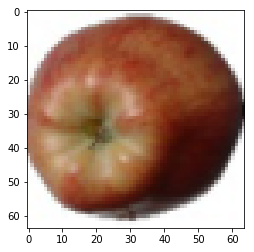

In [13]:
import pylab as plt
plt.imshow(tst_img_data[122].reshape(64,64,3))
plt.show()



In [32]:
import numpy as np
prediction = model.predict(tst_img_data[1000:1001])
print('Prediction Score:\n',prediction[0])
thresholded = (prediction>0.5)*1
print('\nThresholded Score:\n',thresholded[0])
print('\nPredicted Digit:\n',np.where(thresholded == 1)[1][0])

Prediction Score:
 [3.6471565e-08 8.2904069e-07 1.8865281e-07 5.3837087e-18 2.7775273e-12
 5.5409518e-12 9.9999893e-01 1.3877722e-09]

Thresholded Score:
 [0 0 0 0 0 0 1 0]

Predicted Digit:
 6


Text(0.5,1,'Accuracy Curves')

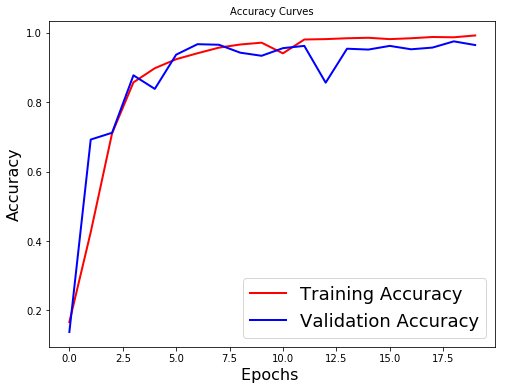

In [33]:
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=2.0)
plt.plot(history.history['val_acc'],'b',linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=10)